<a href="https://colab.research.google.com/github/kesavakrishna/feynn-labs/blob/main/EV_MSA_Proj%202/EV_MSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

loading datasets

In [2]:
# Load your dataset
df = pd.read_csv('/content/EV sales top 10 Indian States Q1 FY 22-23.csv')
df

,State,2W,3W Cargo,3W Passenger,4W,E-Bus,Others
0,Others,30339,1421,10596,1705,33,14
1,Assam,380,94,9064,18,0,5
2,Telangana,8604,235,127,704,0,0
3,Bihar,1648,197,8129,36,0,2
4,Delhi,7353,1060,1748,1581,203,0
5,Tamil Nadu,12802,924,11,555,0,66
6,Rajasthan,10904,1174,3812,347,0,0
7,Gujarat,16424,183,111,671,0,17
8,Karnataka,21547,600,404,909,2,5
9,Maharashtra,24162,526,860,2231,126,3


In [3]:
df1 = pd.read_csv('/content/ev market.csv')
df1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


eda

In [4]:
print(df.shape)
print(df1.shape)

(11, 7)
(103, 14)


In [5]:
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         11 non-null     object
 1   2W            11 non-null     int64 
 2   3W Cargo      11 non-null     int64 
 3   3W Passenger  11 non-null     int64 
 4   4W            11 non-null     int64 
 5   E-Bus         11 non-null     int64 
 6   Others        11 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 744.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-nul

In [6]:
d = df.describe()
d1 = df1.describe()
display(d,d1)

,2W,3W Cargo,3W Passenger,4W,E-Bus,Others
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,12691.363636,728.090909,5785.000000,801.000000,42.454545,11.000000
std,9538.657361,534.852588,8595.273364,743.736781,69.971942,19.115439
min,380.000000,94.000000,11.000000,18.000000,0.000000,0.000000
25%,6397.500000,216.000000,265.500000,200.500000,0.000000,1.000000
50%,10904.000000,600.000000,1748.000000,671.000000,0.000000,5.000000
75%,18985.500000,1117.000000,8596.500000,1245.000000,68.000000,11.500000
max,30339.000000,1595.000000,28773.000000,2231.000000,203.000000,66.000000


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


2W analysis

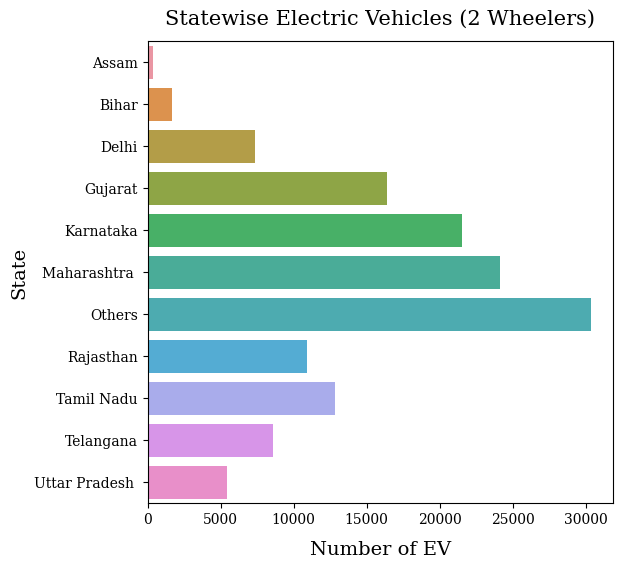

In [10]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='2W')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers)', weight=200, family='serif', size=15, pad=12)
plt.show()

3W Cargo analysis


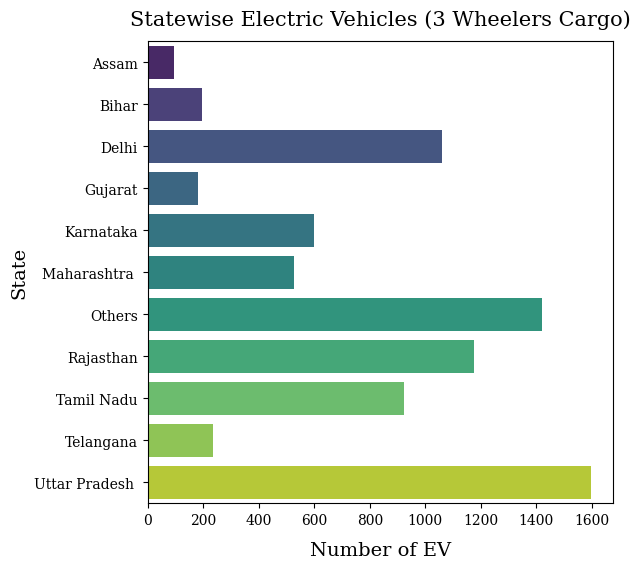

In [11]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='3W Cargo', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers Cargo)', weight=200, family='serif', size=15, pad=12)
plt.show()

3W Passenger Analysis

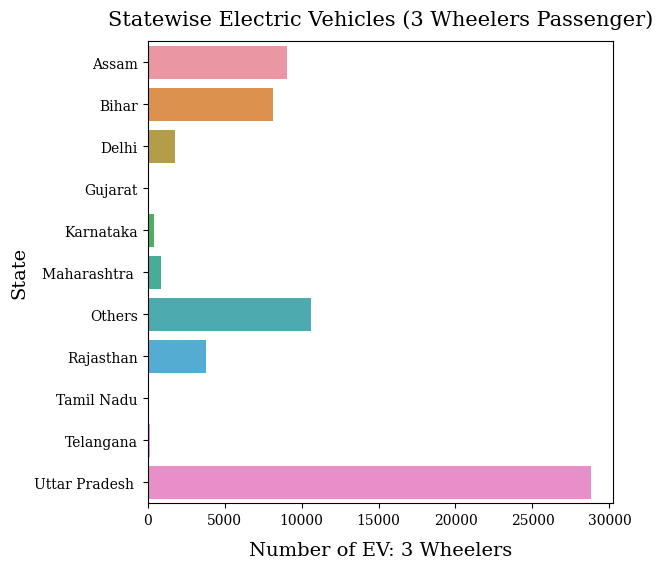

In [12]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='3W Passenger')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers Passenger)', weight=200, family='serif', size=15, pad=12)
plt.show()

4W Analysis

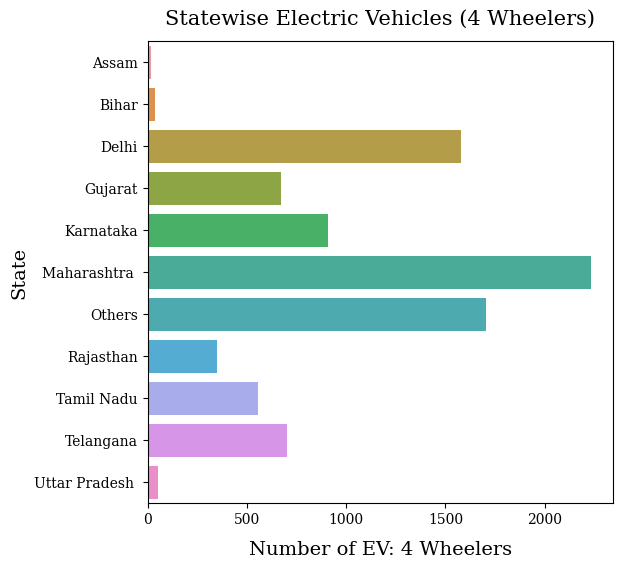

In [13]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='4W')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers)', weight=200, family='serif', size=15, pad=12)
plt.show()

Other types of vehicles analysis

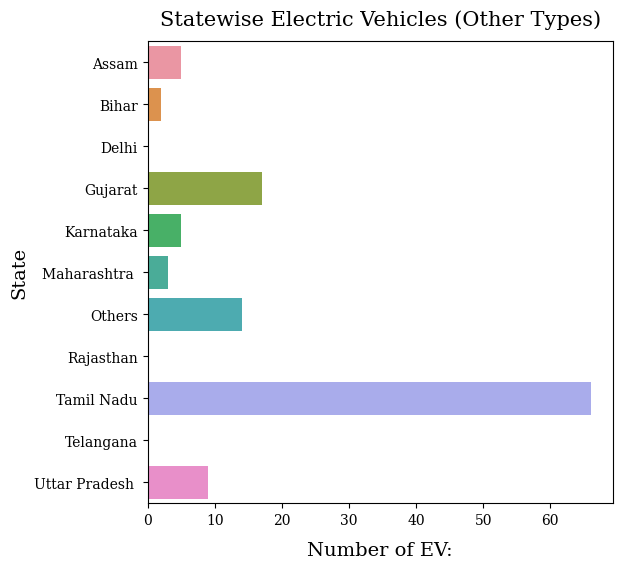

In [14]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['State'].sort_values(ascending=True), x='Others')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV:', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Other Types)', weight=200, family='serif', size=15, pad=12)
plt.show()

EV brands analysis

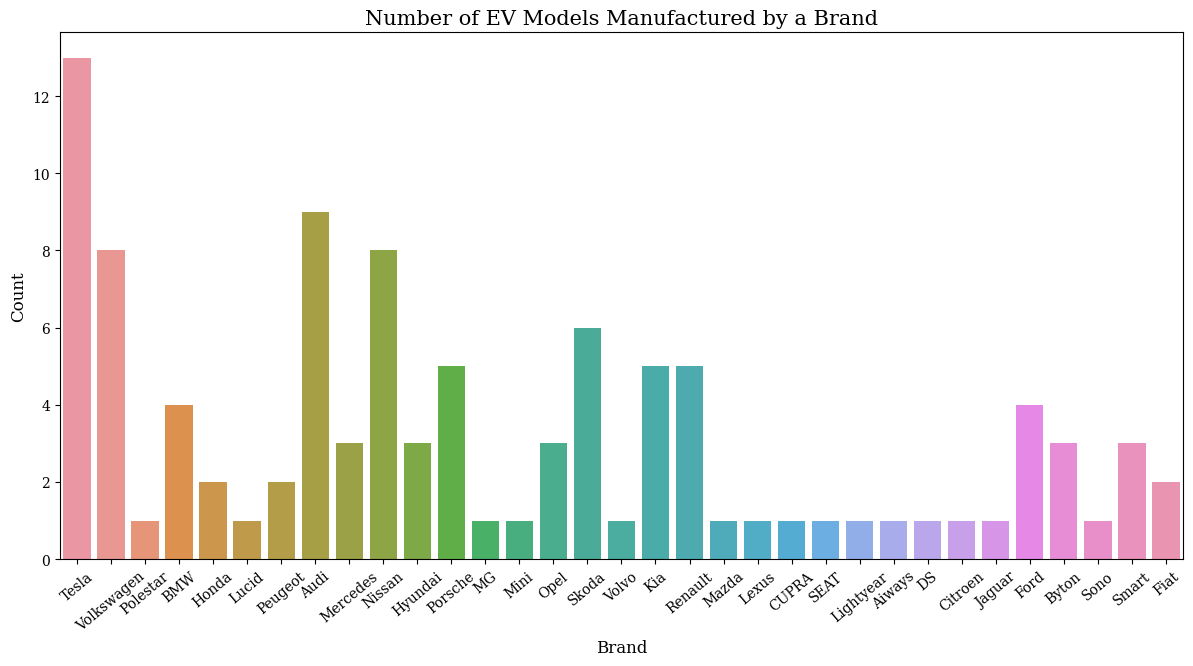

In [15]:
# brand-wise count of EV models
sns.catplot(data=df1, x='Brand', kind='count', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

Anaysis of different body types of EVs

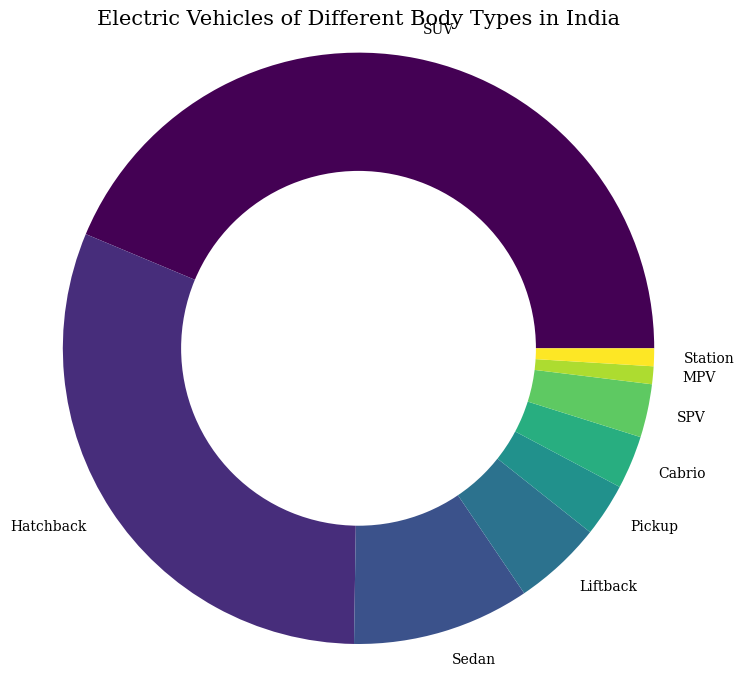

In [17]:
x = df1['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

Analysis of different segments of EVs

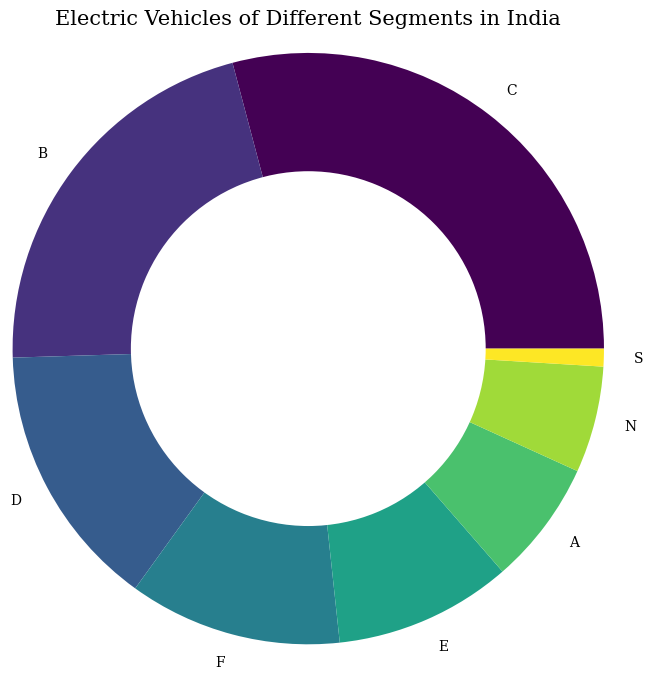

In [20]:
# analysis of different segments of EVs from dataset
x = df1['Segment'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()


Analysis of EVs of different number of seats

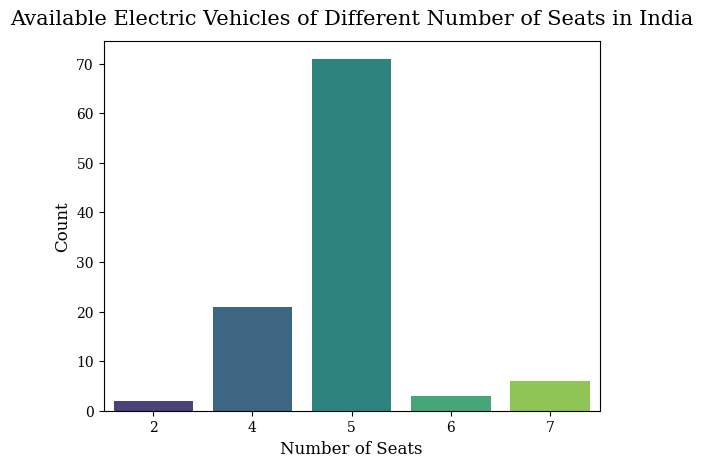

In [21]:
# EVs of different number of seats from dataset
sns.countplot(data=df1, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

Analysis of the number of seats by each brand

<ipython-input-22-6b15efea1b08>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df1, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)


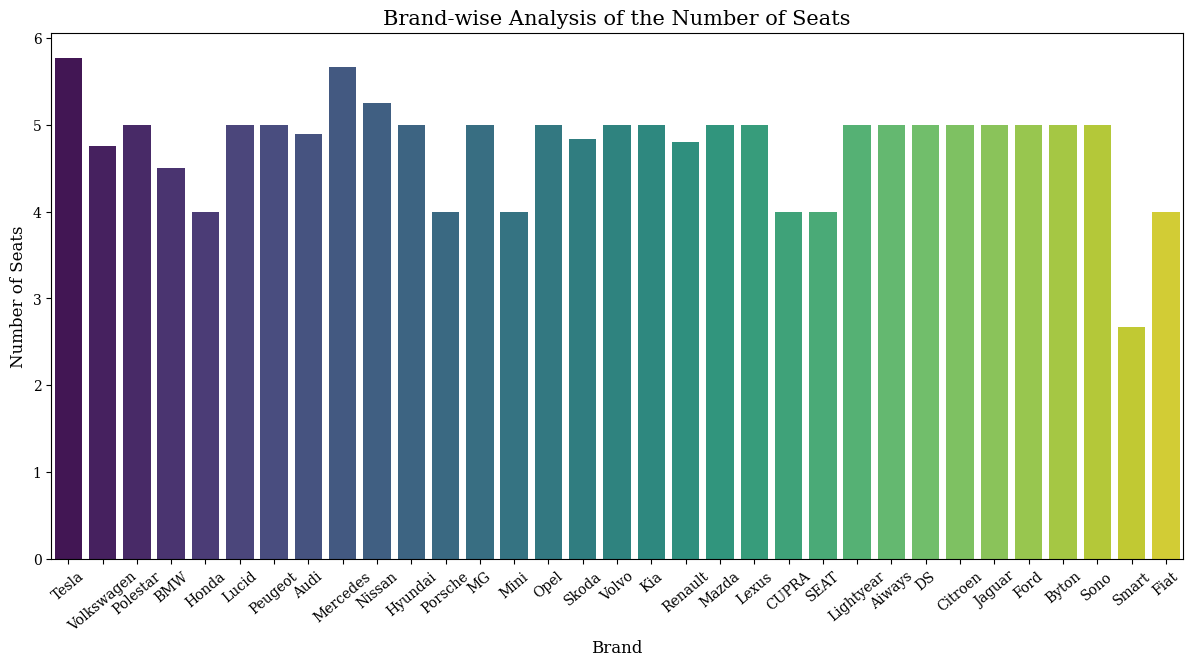

In [22]:
sns.catplot(kind='bar', data=df1, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);

Analysis of different charging plug types


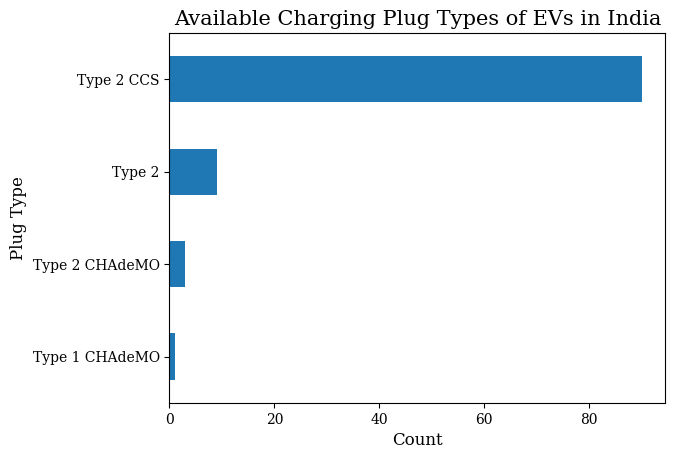

In [24]:
df1['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Charging Plug Types of EVs in India', family='serif', size=15)
plt.show()

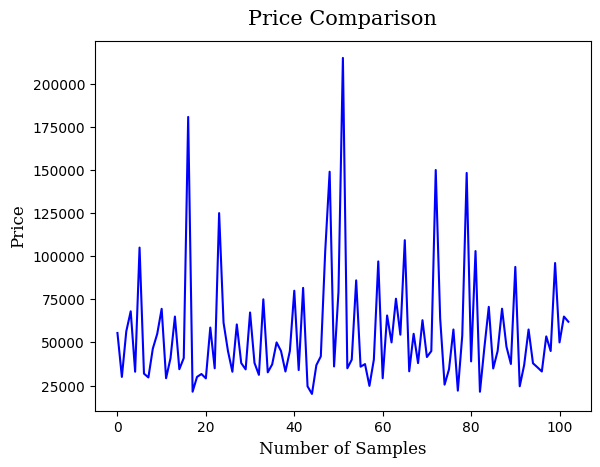

In [ ]:
plt.plot(df1['PriceEuro'], color='Blue')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('EV Price Comparison', family='serif', size=15, pad=12);

<ipython-input-29-521ebd3359b9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, y='Brand', x='PriceEuro', ci=None, palette='viridis')


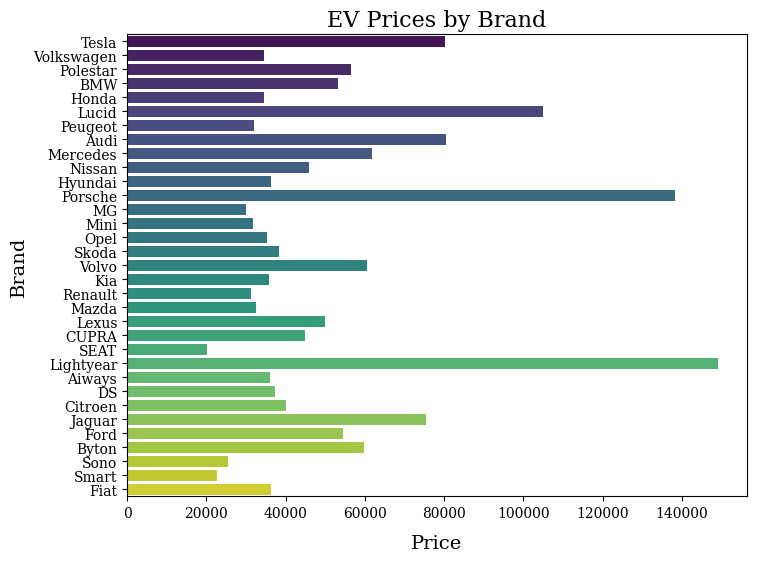

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, y='Brand', x='PriceEuro', ci=None, palette='viridis')
plt.xlabel('Price', fontsize=14, family='serif', labelpad=10)
plt.ylabel('Brand', fontsize=14, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('EV Prices by Brand', fontsize=16, family='serif')
plt.show()

Analysis of EVs based on accleration

<ipython-input-30-6f32fc75b3c4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, y='Brand', x='AccelSec', ci=None, palette='viridis')


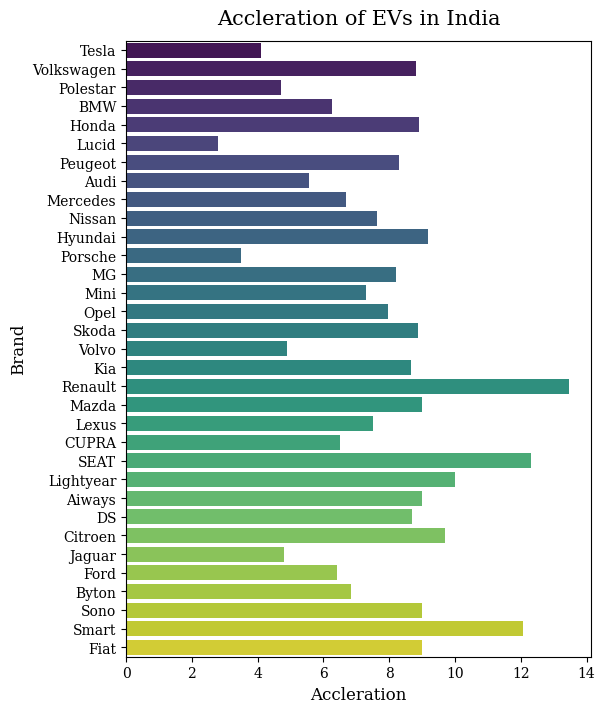

In [30]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df1, y='Brand', x='AccelSec', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

Analysis of EVs based on speed


<ipython-input-31-fb3632aadfdc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')


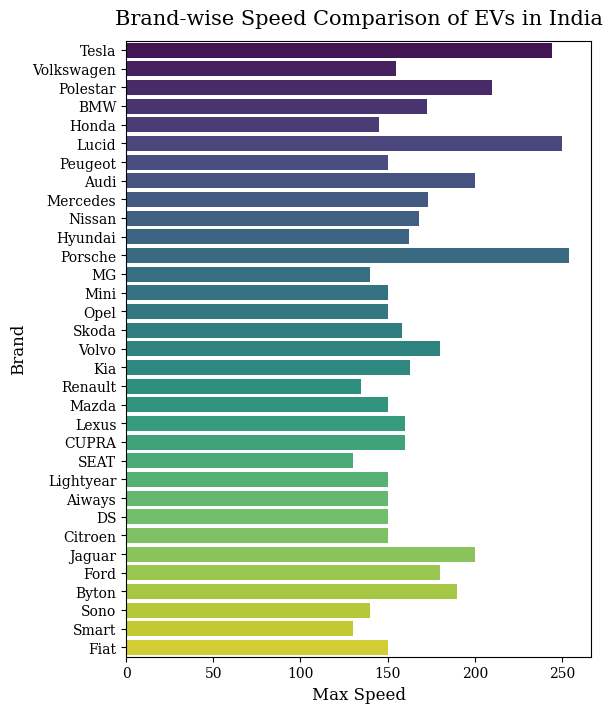

In [31]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df1, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

<ipython-input-32-320f31f910b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df1.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)


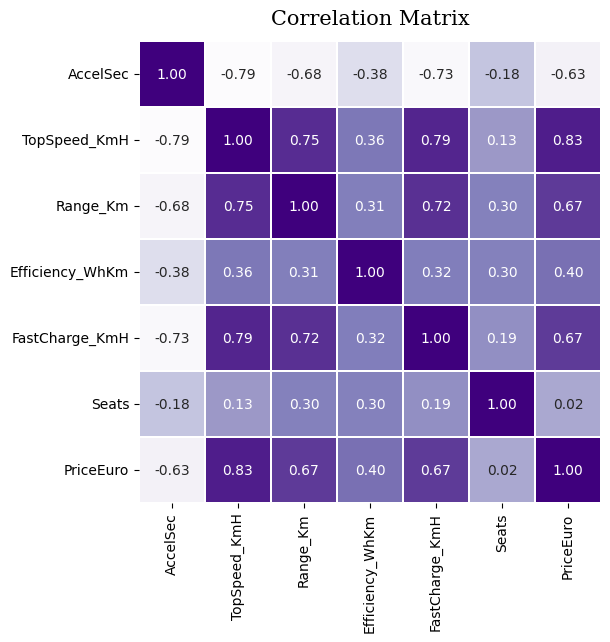

In [32]:
# plotting the correlation matrix from dataset 1
plt.figure(figsize=(6,6))
sns.heatmap(data=df1.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

Analysis of EVs based on the range parameter

<ipython-input-34-21369c178537>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df1, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)


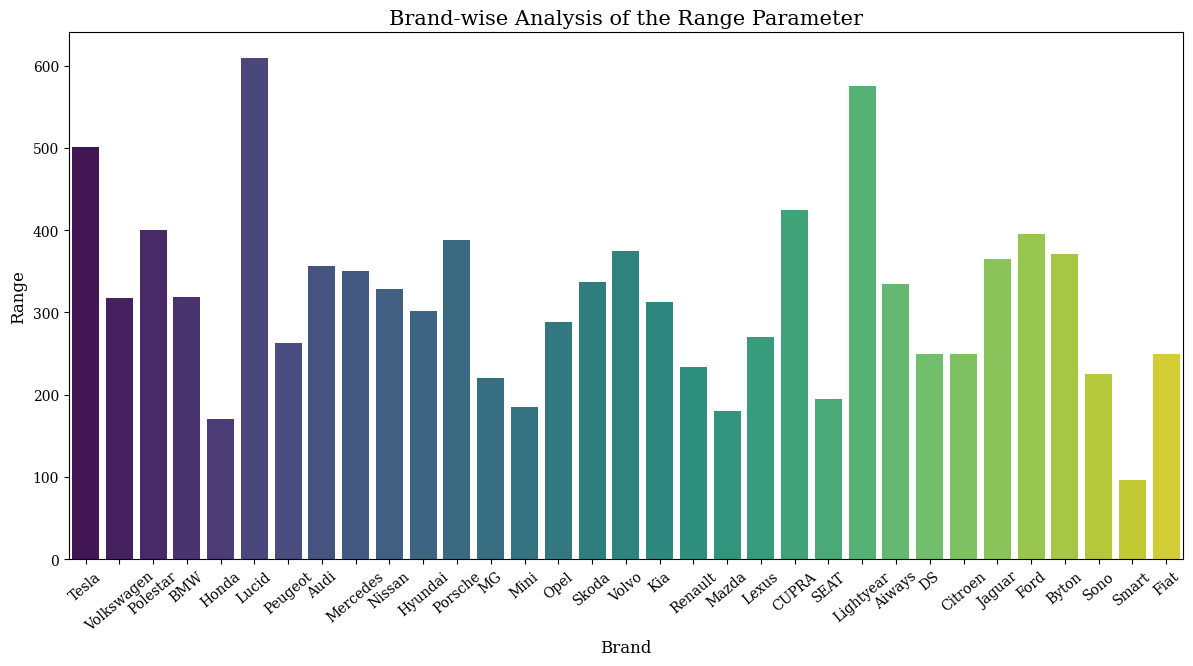

In [34]:
sns.catplot(kind='bar', data=df1, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15);

Model Building Using K-Means Clusteing

In [48]:
# encoding the categorical features

# PowerTrain feature
df1['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df1['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

#BodyStyle feature
df1['BodyStyle'].replace(to_replace=['Sedan','Hatchback','Liftback', 'SUV', 'Cabrio', 'MPV', 'Pickup', 'Station', 'SPV'],value=[0, 1, 2, 3, 4, 5, 6, 7, 8],inplace=True)

#PlugType feature
df1['PlugType'].replace(to_replace=['Type 2 CCS','Type 2 CHAdeMO','Type 2', 'Type 1 CHAdeMO'],value=[0, 1, 2, 3],inplace=True)

df1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,2,0,0,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,0,0,1,C,5,30000
2,Polestar,2,4.7,210,400,181,620,1,2,0,2,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,0,0,3,D,5,68040
4,Honda,e,9.5,145,170,168,190,1,0,0,1,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,1,0,1,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,2,0,3,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,2,0,1,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,2,0,1,C,5,65000


In [49]:
# selecting features for building a model
X = df1[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'PlugType', 'BodyStyle', 'Seats', 'PriceEuro','PowerTrain']]

In [50]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,2.417773,-1.857668,-0.484285,0.610367,0.996045,-0.677975,0.102992,1.345758,-0.524030,-0.251761,-0.290138
1,-2.296790,-0.599086,0.376397,-1.023038,1.280931,-0.099115,-0.063403,-0.502946,0.602815,-0.007325,-0.344441
2,1.611299,-0.532685,-0.515180,0.295597,0.019270,-0.561374,0.181263,0.359641,-0.520891,0.259953,-0.135806
3,0.339293,0.116133,-0.460284,-0.329089,0.143130,1.539369,-0.726854,0.186023,0.450192,0.036561,0.196936
4,-2.573287,-1.254224,-0.470532,0.165033,-0.788366,0.618715,-0.451442,-0.254668,0.412138,0.231175,-0.154605
...,...,...,...,...,...,...,...,...,...,...,...
98,-0.275988,-0.513115,-0.788070,0.048078,-0.112635,-0.122819,-0.461760,-0.034234,0.112806,-0.482103,0.101573
99,2.369113,0.942590,0.187771,-0.596339,-1.552362,-0.229851,-0.865902,-0.020639,0.449373,-0.110012,0.048722
100,0.792491,-0.510026,-0.528261,0.235764,-0.513039,-1.049698,-0.241730,-0.094740,-0.090201,-0.045004,-0.390447
101,1.550530,-0.044484,-0.259253,-0.232317,-0.946906,-0.825260,-0.833979,-0.436903,0.001791,-0.565383,-0.226567


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

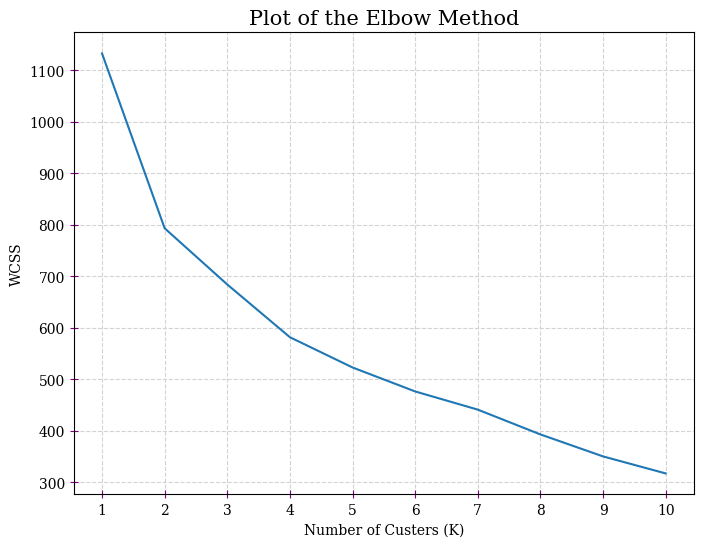

In [52]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [53]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [54]:
# check the labels assigned to each data point
print(kmean.labels_)

[2 1 3 1 1 2 1 1 1 3 3 1 1 1 1 1 2 1 1 1 1 3 1 2 2 1 1 3 1 1 3 1 1 3 1 1 1
 1 1 3 2 1 3 1 1 1 1 2 2 1 3 2 1 1 3 1 1 0 1 2 1 3 1 3 1 2 0 3 0 3 1 3 2 3
 1 1 3 0 3 2 1 3 0 1 3 1 3 3 3 1 3 0 1 3 1 1 1 1 1 3 3 3 3]


In [55]:

# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    54
3    30
2    13
0     6
dtype: int64

In [56]:
# adding a new feature of cluster labels to the dataset 1
df1['clusters'] = kmean.labels_

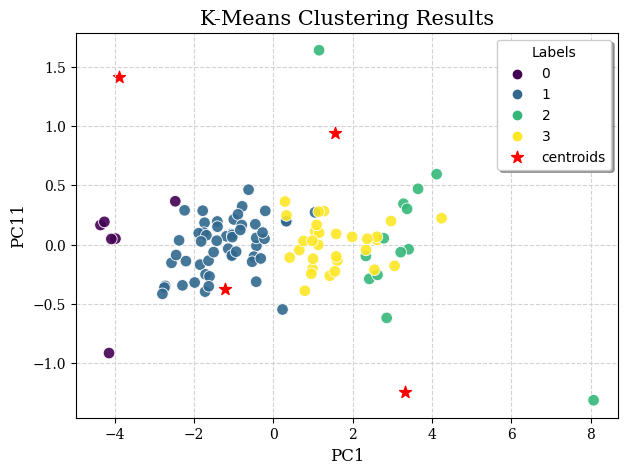

In [61]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC11', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC11', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

In [62]:
df2 = pd.read_csv('/content/STATE-WISE DATA ON PER CAPITA INCOME.csv')
df2

,"States, UT",2020-21,2021-22,2022-23
0,Andhra Pradesh,163746,"1,92,587","2,19,518"
1,Arunachal Pradesh,190212,"2,15,897",NaN
2,Assam,90482,"1,02,965","1,18,504"
3,Bihar,43605,49470,NaN
4,Chhattisgarh,104788,"1,20,704","1,33,898"
5,Goa,431351,"4,72,070",NaN
6,Gujarat,212821,"2,50,100",NaN
7,Haryana,229065,"2,64,835","2,96,685"
8,Himachal Pradesh,183333,"2,01,854",NaN
9,Jharkhand,71071,78660,NaN


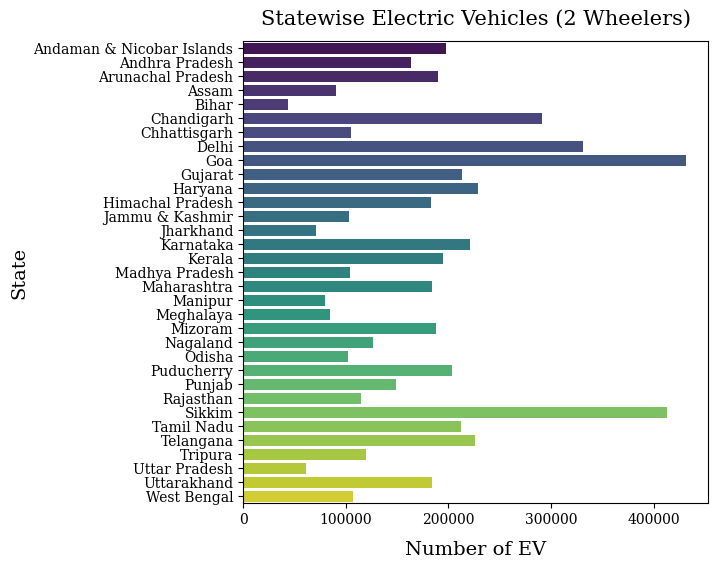

In [63]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y=df2['States, UT'].sort_values(ascending=True), x='2020-21', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers)', weight=200, family='serif', size=15, pad=12)
plt.show()

In [64]:
print(df2.shape)
print(df2.info())

(33, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   States, UT  33 non-null     object
 1   2020-21     33 non-null     int64 
 2   2021-22     32 non-null     object
 3   2022-23     16 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB
None


In [65]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   States, UT  33 non-null     object
 1   2020-21     33 non-null     int64 
 2   2021-22     32 non-null     object
 3   2022-23     16 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB
None


In [66]:
d2 = df2.describe()
d2

,2020-21
count,33.000000
mean,173227.939394
std,92382.777541
min,43605.000000
25%,103654.000000
50%,183333.000000
75%,212174.000000
max,431351.000000
